# **Task 3 - Modeling**


# **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Cognizant_AI_Project/sample_sales_data.csv')

stock_level = pd.read_csv('/content/drive/MyDrive/Cognizant_AI_Project/sensor_stock_levels.csv')

sensor_storage_temp = pd.read_csv('/content/drive/MyDrive/Cognizant_AI_Project/sensor_storage_temperature.csv')

In [ ]:
sales.drop('Unnamed: 0',axis=1,inplace=True)

sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_level.drop('Unnamed: 0',axis=1,inplace=True)

stock_level.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
sensor_storage_temp.drop('Unnamed: 0',axis=1,inplace=True)

sensor_storage_temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [ ]:
sensor_storage_temp.shape , stock_level.shape , sales.shape

((23890, 3), (15000, 4), (7829, 9))

# **Combine All Dataset**

In [ ]:
sales.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [ ]:
stock_level.dtypes

id                      object
timestamp               object
product_id              object
estimated_stock_pct    float64
dtype: object

In [ ]:
sensor_storage_temp.dtypes

id              object
timestamp       object
temperature    float64
dtype: object

**Datetime Format**

In [ ]:
sales['timestamp'] = pd.to_datetime(sales['timestamp'],format='%Y-%m-%d')
sales['timestamp'] = sales['timestamp'].dt.strftime('%Y-%m-%d %H:00:00')
sales['timestamp'] = pd.to_datetime(sales['timestamp'],format='%Y-%m-%d')

In [ ]:
stock_level['timestamp'] = pd.to_datetime(stock_level['timestamp'],format='%Y-%m-%d')
stock_level['timestamp'] = stock_level['timestamp'].dt.strftime('%Y-%m-%d %H:00:00')
stock_level['timestamp'] = pd.to_datetime(stock_level['timestamp'],format='%Y-%m-%d')

In [ ]:
sensor_storage_temp['timestamp'] = pd.to_datetime(sensor_storage_temp['timestamp'],format='%Y-%m-%d')
sensor_storage_temp['timestamp'] = sensor_storage_temp['timestamp'].dt.strftime('%Y-%m-%d %H:00:00')
sensor_storage_temp['timestamp'] = pd.to_datetime(sensor_storage_temp['timestamp'],format='%Y-%m-%d')

**Aggregated Features**

In [ ]:
sales.sample()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
6150,ea96e216-8a8c-48d7-8f75-5be69b874bdd,2022-03-04 12:00:00,6b90c486-a466-41f6-8142-dad072221e23,snacks,premium,2.99,3,8.97,credit card


In [ ]:
sales_aggregate = sales.groupby(['timestamp','product_id']).agg({'quantity':'sum'}).reset_index()

sales_aggregate.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
stock_level.sample()

,id,timestamp,product_id,estimated_stock_pct
9454,d644d447-3984-427a-9f68-74b86cae8035,2022-03-06 12:00:00,3061055c-3ff5-4208-8041-5ae0edb3d94d,0.34


In [ ]:
stock_aggregate = stock_level.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'sum'}).reset_index()

stock_aggregate.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
sensor_storage_temp.sample()

,id,timestamp,temperature
15798,ab974de3-29ef-4a1c-9503-dbd618fca571,2022-03-01 14:00:00,2.68


In [ ]:
sensor_storage_temp_agg = sensor_storage_temp.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()

sensor_storage_temp_agg

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


In [ ]:
df = pd.merge(stock_aggregate,sales_aggregate,on=['timestamp', 'product_id'],how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merged_df = df.merge(sensor_storage_temp_agg,on=['timestamp'],how='left')

merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.028850
...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


In [ ]:
merged_df.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

In [ ]:
merged_df['quantity'].fillna(0,inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [ ]:
product_category = sales[['product_id','category']].drop_duplicates()

product_category

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [ ]:
product_price = sales[['product_id', 'unit_price']].drop_duplicates()
product_price

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,14.99
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,13.49
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,14.19
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,16.99


In [ ]:
merged_df = merged_df.merge(product_category,on=['product_id'],how='left')

merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,pets
...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,meat
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat


In [ ]:
merged_df = merged_df.merge(product_price,on=['product_id'],how='left')

merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,pets,8.19
...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit,4.99
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,meat,19.99
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99


In [ ]:
merged_df.isnull().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
category               0
unit_price             0
dtype: int64

# **Feature Engineering**

In [ ]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day

merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.day_of_week

merged_df['timestamp_month'] = merged_df['timestamp'].dt.month

merged_df['timestamp_year'] = merged_df['timestamp'].dt.year

merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour

merged_df.drop('timestamp',axis=1,inplace=True)

In [ ]:
merged_df.sample()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_month,timestamp_year,timestamp_hour
2842,6370633a-ac41-42a1-a29e-56c14d63786f,0.46,4.0,-1.012867,vegetables,2.49,2,2,3,2022,18


In [ ]:
merged_df_1 = pd.get_dummies(merged_df, columns=['category'])
merged_df_1.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_month,timestamp_year,timestamp_hour,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,3,2022,9,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,3,2022,9,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,3,2022,9,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,3,2022,9,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,3,2022,9,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
merged_df_1.columns

Index(['product_id', 'estimated_stock_pct', 'quantity', 'temperature',
       'unit_price', 'timestamp_day_of_month', 'timestamp_day_of_week',
       'timestamp_month', 'timestamp_year', 'timestamp_hour',
       'category_baby products', 'category_baked goods', 'category_baking',
       'category_beverages', 'category_canned foods', 'category_cheese',
       'category_cleaning products', 'category_condiments and sauces',
       'category_dairy', 'category_frozen', 'category_fruit',
       'category_kitchen', 'category_meat', 'category_medicine',
       'category_packaged foods', 'category_personal care', 'category_pets',
       'category_refrigerated items', 'category_seafood', 'category_snacks',
       'category_spices and herbs', 'category_vegetables'],
      dtype='object')

In [ ]:
merged_df_1.drop('product_id',axis=1,inplace=True)

In [ ]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             10845 non-null  float64
 1   quantity                        10845 non-null  float64
 2   temperature                     10845 non-null  float64
 3   unit_price                      10845 non-null  float64
 4   timestamp_day_of_month          10845 non-null  int64  
 5   timestamp_day_of_week           10845 non-null  int64  
 6   timestamp_month                 10845 non-null  int64  
 7   timestamp_year                  10845 non-null  int64  
 8   timestamp_hour                  10845 non-null  int64  
 9   category_baby products          10845 non-null  uint8  
 10  category_baked goods            10845 non-null  uint8  
 11  category_baking                 10845 non-null  uint8  
 12  category_beverages              

In [ ]:
merged_df.isnull().sum().sum()

0

In [ ]:
merged_df.to_csv('Combined.csv',index=False)

# **Model**



```
# Note : Traget variable is estimated_stock_pct
```



In [ ]:
merged_df.drop('product_id',axis=1,inplace=True)

In [ ]:
merged_df['category'].unique()

array(['kitchen', 'vegetables', 'baby products', 'beverages', 'pets',
       'meat', 'fruit', 'spices and herbs', 'frozen', 'medicine',
       'baking', 'personal care', 'cleaning products', 'dairy',
       'condiments and sauces', 'refrigerated items', 'packaged foods',
       'baked goods', 'snacks', 'cheese', 'canned foods', 'seafood'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
merged_df['category'] = encoder.fit_transform(merged_df['category'].values.reshape(-1,1))

In [ ]:
merged_df['category'].unique()

array([11., 21.,  0.,  3., 16., 12., 10., 20.,  9., 13.,  2., 15.,  6.,
        8.,  7., 17., 14.,  1., 19.,  5.,  4., 18.])

**Split The Data:**

In [ ]:
x = merged_df.drop('estimated_stock_pct',axis=1)

y = merged_df['estimated_stock_pct']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
x

,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_month,timestamp_year,timestamp_hour
0,3.0,-0.028850,11.0,11.19,1,1,3,2022,9
1,3.0,-0.028850,21.0,1.49,1,1,3,2022,9
2,0.0,-0.028850,0.0,14.19,1,1,3,2022,9
3,0.0,-0.028850,3.0,20.19,1,1,3,2022,9
4,0.0,-0.028850,16.0,8.19,1,1,3,2022,9
...,...,...,...,...,...,...,...,...,...
10840,4.0,-0.165077,10.0,4.99,7,0,3,2022,19
10841,0.0,-0.165077,12.0,19.99,7,0,3,2022,19
10842,3.0,-0.165077,14.0,6.99,7,0,3,2022,19
10843,3.0,-0.165077,12.0,14.99,7,0,3,2022,19


In [ ]:
y

0        0.89
1        0.14
2        0.67
3        0.82
4        0.05
         ... 
10840    0.50
10841    0.26
10842    0.78
10843    0.92
10844    0.01
Name: estimated_stock_pct, Length: 10845, dtype: float64

In [ ]:
accuracy = []

for fold in range(0, 5):


  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Random Data generation
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.2)


  # Train model
  trained_model = model.fit(xtrain, ytrain)

  # Predict
  y_pred = trained_model.predict(xtest)

  # prediction Accuracy
  r2 = r2_score(ytest,y_pred)
  accuracy.append(r2)
  print(f"Fold {fold + 1}: R2-Score = {r2:.3f}")

print(f"Average R2: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: R2-Score = -0.160
Fold 2: R2-Score = -0.150
Fold 3: R2-Score = -0.133
Fold 4: R2-Score = -0.160
Fold 5: R2-Score = -0.138
Average R2: -0.15




```
# The Accuracy Is not Good So we want More Data
```



**Importance Of Feature**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
features = [i  for i in x.columns]
importances = model.feature_importances_
indices = np.argsort(importances)
indices

array([6, 7, 5, 4, 0, 8, 2, 1, 3])

In [ ]:
features

['quantity',
 'temperature',
 'category',
 'unit_price',
 'timestamp_day_of_month',
 'timestamp_day_of_week',
 'timestamp_month',
 'timestamp_year',
 'timestamp_hour']

In [ ]:
importances

array([0.07798628, 0.19105981, 0.1884245 , 0.30827429, 0.05682682,
       0.05587924, 0.        , 0.        , 0.12154907])

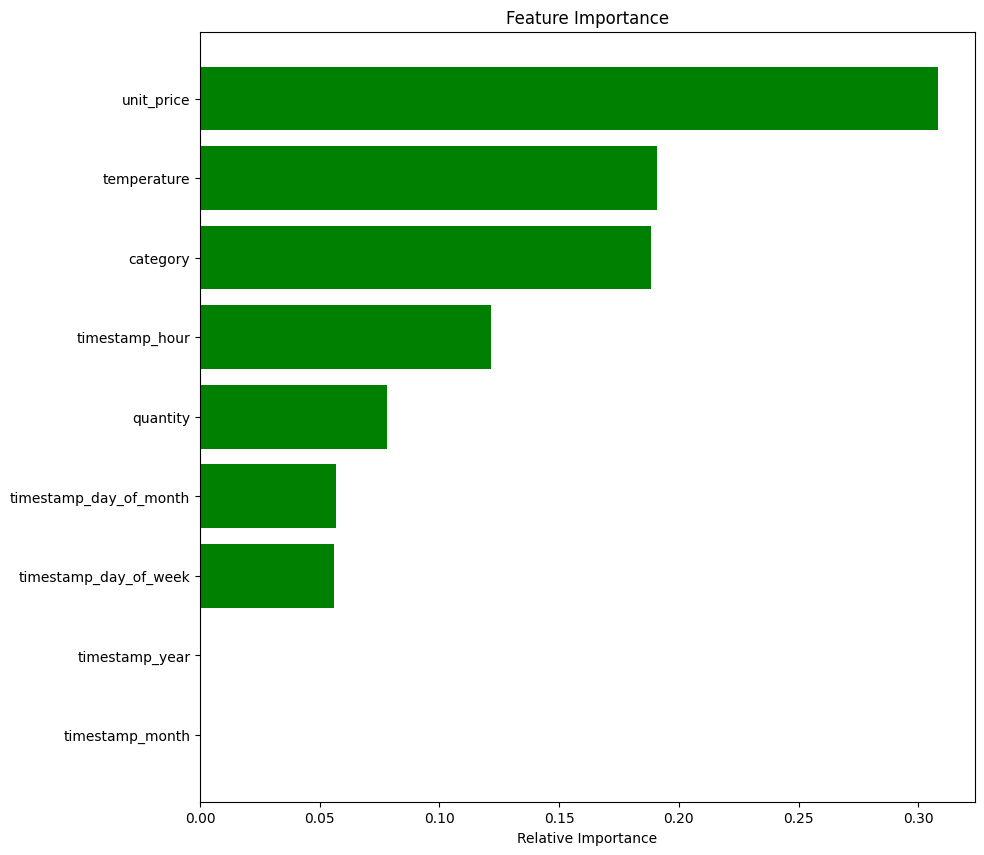

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

plt.barh(range(len(indices)),importances[indices],color='g')
plt.yticks(range(len(indices)),[features[i] for i in indices ])
plt.title('Feature Importance')

plt.xlabel('Relative Importance')
plt.show()

**Insights**


```
# Acc to Visual , Unit Price , Temperature , Category features helps model to predict the target variable more.
```

